**compute pyramid**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

nlevels = 8
scaleFactor = 1.2


mvScaleFactor = [0.0] * nlevels
mvScaleFactor[0] = 1.0
for i in range(1, nlevels):
    mvScaleFactor[i] = mvScaleFactor[i-1] * scaleFactor

EDGE_THRESHOLD = 19

mvInvScaleFactor = [1.0 / mvScaleFactor[i] for i in range(nlevels)]
mvImagePyramid = [None] * nlevels


def compute_pyramid(image):
    for level in range(nlevels):
        scale = mvInvScaleFactor[level]
        sz = (int(image.shape[1] * scale), int(image.shape[0] * scale))
        wholeSize = (sz[0] + EDGE_THRESHOLD * 2, sz[1] + EDGE_THRESHOLD * 2)
        temp = np.empty(wholeSize, dtype=image.dtype)
        masktemp = None
        mvImagePyramid[level] = temp[EDGE_THRESHOLD:EDGE_THRESHOLD+sz[1], EDGE_THRESHOLD:EDGE_THRESHOLD+sz[0]]

        # Compute the resized image
        if level != 0:
            cv2.resize(mvImagePyramid[level-1], mvImagePyramid[level], sz, 0, 0, cv2.INTER_LINEAR)
            cv2.copyMakeBorder(mvImagePyramid[level], temp, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                               cv2.BORDER_REFLECT_101+cv2.BORDER_ISOLATED)
        else:
            cv2.copyMakeBorder(image, temp, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                               cv2.BORDER_REFLECT_101)

**rgb and d overlay alignment**

In [ ]:
import numpy as np

def get_rgb_depth_overlay(imgRgb, imgDepthAbs):
    # Check dims.
    assert imgRgb.ndim == 3
    assert imgDepthAbs.ndim == 2

    # Check sizes.
    H, W, D = imgRgb.shape
    assert D == 3
    assert imgDepthAbs.shape == (H, W)

    # Check types.
    assert imgRgb.dtype == np.uint8
    assert imgDepthAbs.dtype == np.float64

    imgDepth = imgDepthAbs - np.min(imgDepthAbs)
    imgDepth = imgDepth / np.max(imgDepth)
    imgDepth = (imgDepth * 255).astype(np.uint8)

    imgOverlay = imgRgb.reshape(H * W, 3)
    imgOverlay[:, 2] = imgOverlay[:, 1]
    imgOverlay[:, 1] = imgDepth.flatten()

    imgOverlay = imgOverlay.reshape(H, W, 3)
    return imgOverlay


**calling and displaying the overlay**

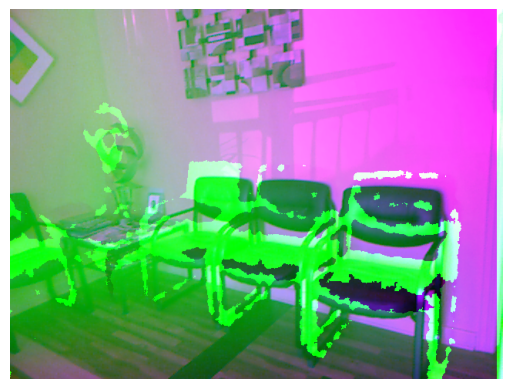

True

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load RGB and depth frames
rgb_frame = cv2.imread('r.ppm')
depth_frame = cv2.imread('d.pgm', cv2.IMREAD_UNCHANGED).astype(np.float64)

# Call get_rgb_depth_overlay function
overlay = get_rgb_depth_overlay(rgb_frame, depth_frame)

# Display the overlay image
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Save the overlay image
cv2.imwrite('overlay.png', overlay)

In [ ]:
# Load the input image
image = cv2.imread('overlay.png')

# Call the compute_pyramid function
compute_pyramid(image)

# Visualize the pyramid images
fig, axes = plt.subplots(nlevels, 1, figsize=(6, 20))
for level in range(nlevels):
    axes[level].imshow(cv2.cvtColor(mvImagePyramid[level], cv2.COLOR_BGR2RGB))
    axes[level].axis('off')
    axes[level].set_title(f"Level {level}")
plt.tight_layout()
plt.show()

error: ignored

**working compute pyramid**

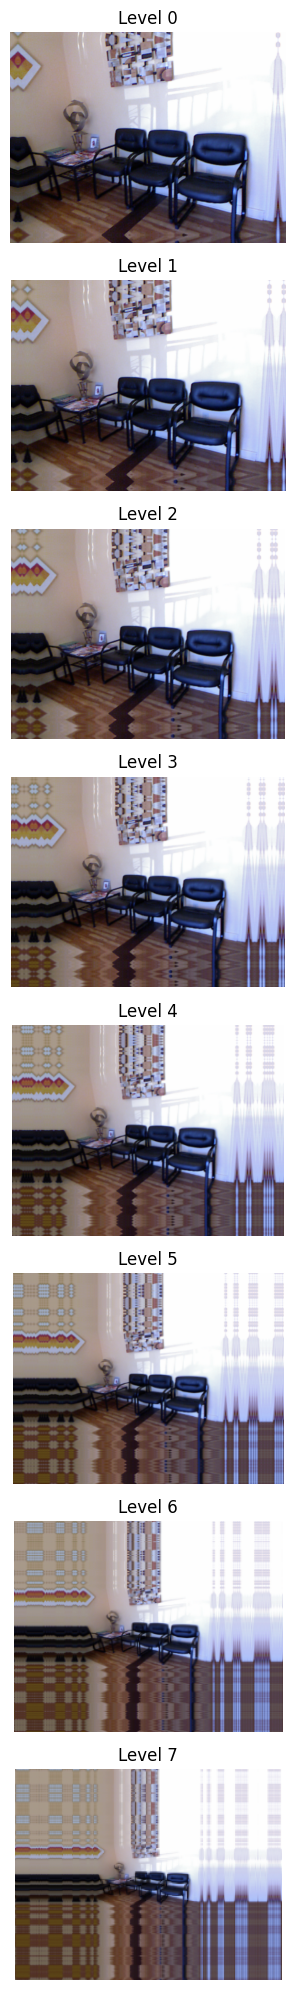

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

nlevels = 8
scaleFactor = 1.2
EDGE_THRESHOLD = 19

# Initialize mvImagePyramid
mvImagePyramid = [None] * nlevels

def compute_pyramid(image):
    mvImagePyramid[0] = cv2.copyMakeBorder(image, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                                           cv2.BORDER_REFLECT_101)

    for level in range(1, nlevels):
        scale = scaleFactor ** level
        sz = (int(image.shape[1] / scale), int(image.shape[0] / scale))
        resized = cv2.resize(mvImagePyramid[level-1], sz, interpolation=cv2.INTER_LINEAR)
        mvImagePyramid[level] = cv2.copyMakeBorder(resized, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD, EDGE_THRESHOLD,
                                                   cv2.BORDER_REFLECT_101 + cv2.BORDER_ISOLATED)

# Example usage
image = cv2.imread('r.ppm')

compute_pyramid(image)

# Visualize the pyramid images
fig, axes = plt.subplots(nlevels, 1, figsize=(6, 20))
for level in range(nlevels):
    axes[level].imshow(cv2.cvtColor(mvImagePyramid[level], cv2.COLOR_BGR2RGB))
    axes[level].axis('off')
    axes[level].set_title(f"Level {level}")
plt.tight_layout()
plt.show()


**getting depth from .pgm**

(480, 640)


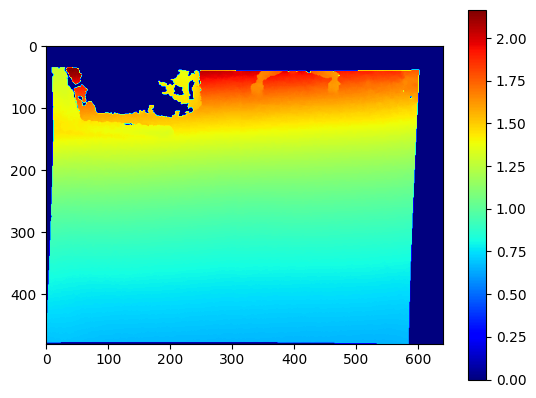

[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.6824 0.6824 0.6824 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]
(480, 640)


In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the raw depth image
depth_image = cv2.imread('tum_d.png', cv2.IMREAD_UNCHANGED)

print(depth_image.shape)

# Convert pixel intensity values to depth values in meters
depth_scale = 5000.0
depth_image_meters = depth_image.astype(np.float32) / depth_scale

# Handle missing or invalid depth measurements (if necessary)
# For example, you can replace zero values with a default depth value

# Visualize the estimated depth data
plt.imshow(depth_image_meters, cmap='jet')
plt.colorbar()
plt.show()

print(depth_image_meters)
print(depth_image_meters.shape)